In [1056]:
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)

In [1057]:
filepath="data/pima-indians-diabetes.xls"
all_df=pd.read_excel(filepath)

In [1058]:
all_df[:2]

,Number of times pregnant,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [1059]:
all_df[:2]

,Number of times pregnant,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [1060]:
msk = numpy.random.rand(len(all_df)) < 0.8
train_df=all_df[msk]
test_df=all_df[~msk]

In [1061]:
print('total:',len(all_df),
      'train:',len(train_df),
      'test:',len(test_df)) 

total: 768 train: 616 test: 152


In [1062]:
all_df.isnull().sum()

Number of times pregnant    0
Unnamed: 1                  0
Unnamed: 2                  0
Unnamed: 3                  0
Unnamed: 4                  0
Unnamed: 5                  0
Unnamed: 6                  0
Unnamed: 7                  0
Unnamed: 8                  0
dtype: int64

In [1063]:
def PreprocessData(raw_df):
    
    ndarray= all_df.values
    Features=ndarray[:,1:] 
    Label=ndarray[:,8]
    
    from sklearn import preprocessing
    minmax_scale=preprocessing.MinMaxScaler(feature_range=(0,1))
    scaledFeatures=minmax_scale.fit_transform(Features)
    
    return scaledFeatures,Label

In [1064]:
train_Features,train_Label=PreprocessData(train_df)
test_Features,test_Label=PreprocessData(test_df)

In [1065]:
train_Features[:4]

array([[0.74371859, 0.59016393, 0.35353535, 0.        , 0.50074516,
        0.23441503, 0.48333333, 1.        ],
       [0.42713568, 0.54098361, 0.29292929, 0.        , 0.39642325,
        0.11656704, 0.16666667, 0.        ],
       [0.91959799, 0.52459016, 0.        , 0.        , 0.34724292,
        0.25362938, 0.18333333, 1.        ],
       [0.44723618, 0.54098361, 0.23232323, 0.11111111, 0.41877794,
        0.03800171, 0.        , 0.        ]])

In [1066]:
train_Label[:4]

array([1., 0., 1., 0.])

In [1067]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation,Flatten
from keras.layers.embeddings import Embedding

In [1068]:
model=Sequential() 

In [1069]:
model.add(Dense(units=40, input_dim=8, 
                kernel_initializer='uniform', 
                activation='relu'))

In [1070]:
model.add(Dense(units=10,
               kernel_initializer='uniform', 
                activation='relu'))

In [1071]:
model.add(Dense(units=1, 
               kernel_initializer='uniform', 
                activation='sigmoid'))

In [1072]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_123 (Dense)            (None, 40)                360       
_________________________________________________________________
dense_124 (Dense)            (None, 10)                410       
_________________________________________________________________
dense_125 (Dense)            (None, 1)                 11        
Total params: 781
Trainable params: 781
Non-trainable params: 0
_________________________________________________________________


In [1073]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',metrics=['accuracy'])

In [1074]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=10 , 
                         batch_size=80 , verbose=2)

Train on 614 samples, validate on 154 samples
Epoch 1/10
 - 2s - loss: 0.6924 - acc: 0.6140 - val_loss: 0.6915 - val_acc: 0.6429
Epoch 2/10
 - 0s - loss: 0.6907 - acc: 0.6531 - val_loss: 0.6895 - val_acc: 0.6429
Epoch 3/10
 - 0s - loss: 0.6883 - acc: 0.6531 - val_loss: 0.6867 - val_acc: 0.6429
Epoch 4/10
 - 0s - loss: 0.6849 - acc: 0.6531 - val_loss: 0.6828 - val_acc: 0.6429
Epoch 5/10
 - 0s - loss: 0.6802 - acc: 0.6531 - val_loss: 0.6771 - val_acc: 0.6429
Epoch 6/10
 - 0s - loss: 0.6736 - acc: 0.6531 - val_loss: 0.6689 - val_acc: 0.6429
Epoch 7/10
 - 0s - loss: 0.6639 - acc: 0.6531 - val_loss: 0.6574 - val_acc: 0.6429
Epoch 8/10
 - 0s - loss: 0.6507 - acc: 0.6531 - val_loss: 0.6424 - val_acc: 0.6429
Epoch 9/10
 - 0s - loss: 0.6337 - acc: 0.6661 - val_loss: 0.6224 - val_acc: 0.6558
Epoch 10/10
 - 0s - loss: 0.6117 - acc: 0.6824 - val_loss: 0.5978 - val_acc: 0.6818


In [1075]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train],color='blue')
    plt.plot(train_history.history[validation],color='magenta')
    plt.title('Train_history')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

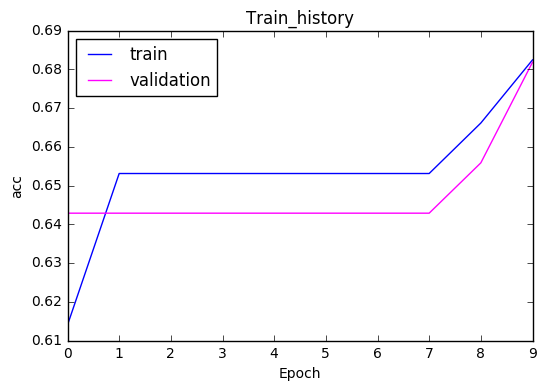

In [1076]:
show_train_history(train_history,'acc','val_acc')

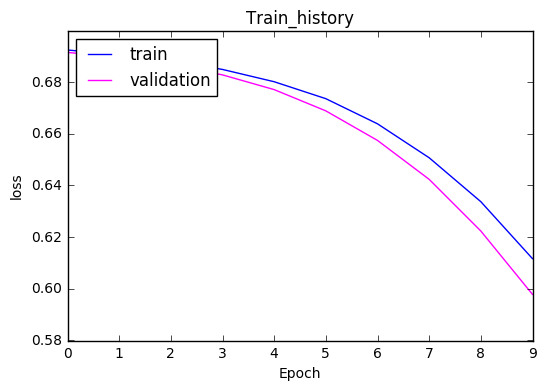

In [1077]:
show_train_history(train_history,'loss','val_loss')

In [1078]:
scores=model.evaluate(x=test_Features,
                     y=test_Label)

768/768 [==============================] - 0s 230us/step


In [1079]:
scores[1]

0.6953125

In [1080]:
probility=model.predict(test_Features)

In [1081]:
probility[:10]

array([[0.49279854],
       [0.4175762 ],
       [0.5006225 ],
       [0.41846392],
       [0.4984527 ],
       [0.41999516],
       [0.49937683],
       [0.43297526],
       [0.49410188],
       [0.5011585 ]], dtype=float32)